#  Linear Regression

## What I Learned
I now understand that supervised learning splits into **classification** (categories) and **regression** (numbers).  
Linear regression is the simplest regression model: `Y = mX + b`. It predicts a numeric outcome by fitting the best line to data.  
Key concepts:  
- **Residuals** = actual − predicted.  
- **SSE** = sum of squared errors, what the model tries to minimize.  
- **Outliers** can distort the line, so they must be detected and handled.  

## My Understanding
It’s not just math — the slope shows how strongly one variable affects another.  
Example: more study hours → higher exam score.  
The goal is finding the line that minimizes overall error, not just drawing any line.  

## Real-World Use
I can apply this to:  
- Predicting **insurance charges** from age, BMI, smoker status.  
- **Sales forecasting** based on ad budget.  
- **Fitness tracking** (calories burned vs time).  




## 🧑‍💻 Quick Example


In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({
    "Race": ["Asian", "Asian", "Asian", "Asian", "White", "White", "White", "White", 
             "Black", "Black", "Black", "Black", "Hispanic", "Hispanic", "Hispanic", "Hispanic"],
    "Age": [18, 25, 30, 40, 18, 25, 35, 45, 18, 28, 38, 50, 20, 27, 34, 42],
    "Weight": [55, 60, 65, 70, 68, 75, 80, 85, 70, 78, 85, 90, 60, 67, 72, 78],
    "Height": [165, 168, 170, 171, 175, 178, 180, 181, 177, 180, 182, 183, 170, 173, 174, 176]
})



display(df)

,Race,Age,Weight,Height
0,Asian,18,55,165
1,Asian,25,60,168
2,Asian,30,65,170
3,Asian,40,70,171
4,White,18,68,175
5,White,25,75,178
6,White,35,80,180
7,White,45,85,181
8,Black,18,70,177
9,Black,28,78,180


In [39]:
from sklearn.preprocessing import OneHotEncoder


oneh_ecoder = OneHotEncoder()


race_encoded = oneh_ecoder.fit_transform(df[['Race']])
race_df = pd.DataFrame(race_encoded.toarray(), columns=oneh_ecoder.get_feature_names_out(['Race']))
df = pd.concat([df.drop('Race', axis=1),race_df], axis=1)

display(df)

,Age,Weight,Height,Race_Asian,Race_Black,Race_Hispanic,Race_White
0,18,55,165,1.0,0.0,0.0,0.0
1,25,60,168,1.0,0.0,0.0,0.0
2,30,65,170,1.0,0.0,0.0,0.0
3,40,70,171,1.0,0.0,0.0,0.0
4,18,68,175,0.0,0.0,0.0,1.0
5,25,75,178,0.0,0.0,0.0,1.0
6,35,80,180,0.0,0.0,0.0,1.0
7,45,85,181,0.0,0.0,0.0,1.0
8,18,70,177,0.0,1.0,0.0,0.0
9,28,78,180,0.0,1.0,0.0,0.0


In [47]:
X = df.drop('Height',axis=1)
y = df['Height']


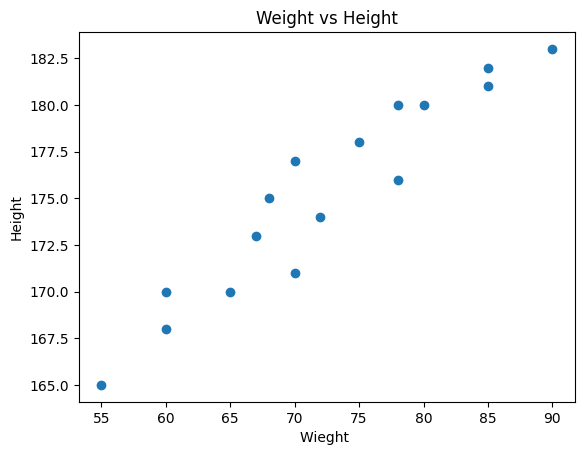

In [61]:
import matplotlib.pyplot as plt

plt.scatter(X["Weight"], y)
plt.xlabel("Wieght ")
plt.ylabel("Height")
plt.title("Weight vs Height")
plt.show()








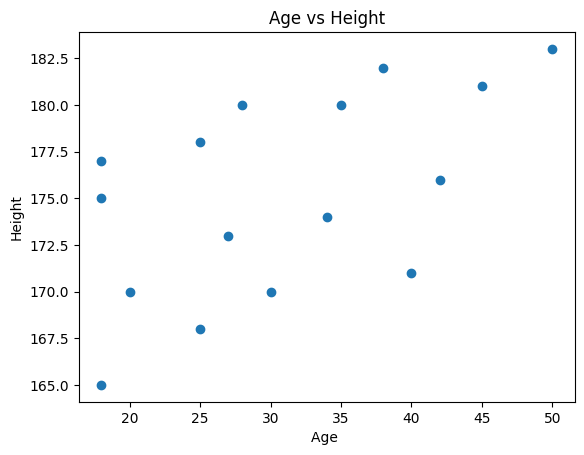

In [63]:

plt.scatter(X["Age"], y)
plt.xlabel("Age ")
plt.ylabel("Height")
plt.title("Age vs Height")
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split( X ,y, test_size=0.2 , random_state=42 )

model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_train)
print("PREDICTED VALUES", y_train)

PREDICTED VALUES 13    173
11    183
8     177
9     180
2     170
15    176
4     175
7     181
10    182
12    170
3     171
6     180
Name: Height, dtype: int64


In [73]:
print("Actual Values", list(y_train))

Actual Values [173, 183, 177, 180, 170, 176, 175, 181, 182, 170, 171, 180]


In [69]:
model.score(X_train, y_train)

0.996243501556625

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_test_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error: 0.44498702547442104
Root Mean Squared Error (RMSE): 0.6670734783173597
R² Score: 0.9826769041177841


#### This model performed extremely well on the toy dataset, with predictions off by less than a unit and an R² of 0.98. While this shows the model can capture patterns in the sample, I recognize that toy data is simplified, so the real challenge will be testing on more complex, real-world datasets.

In [89]:
new_data_to_predict = pd.DataFrame([{
    'Age': 22,
    'Weight': 67, 
    'Race_Asian': 0.0,
    'Race_Black': 0.0,
    'Race_Hispanic': 0.0,
    'Race_White': 1.0
}])

# Ensure columns are in the same order as X
new_data_to_predict = new_data_to_predict[X.columns]
predicted_height = model.predict(new_data_to_predict)

print("Predicted Height:", predicted_height[0])

Predicted Height: 174.5144777500173
